In [5]:
from hyppo.sims import *
from sklearn.ensemble import RandomForestRegressor
import  matplotlib.pyplot as plt
import numpy as np


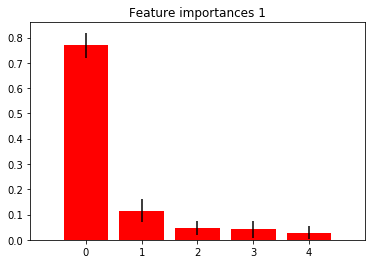

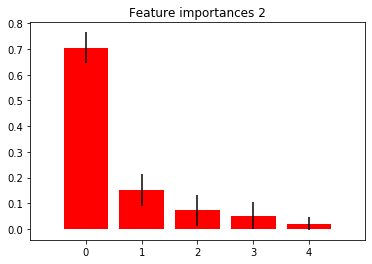

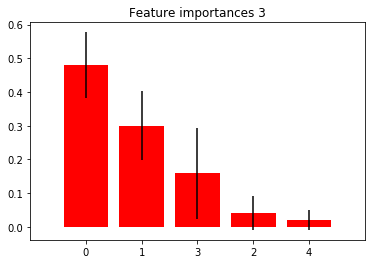

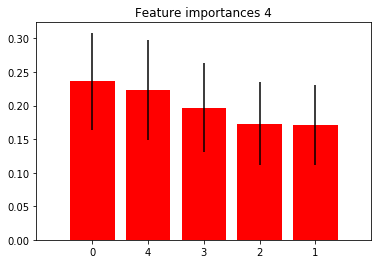

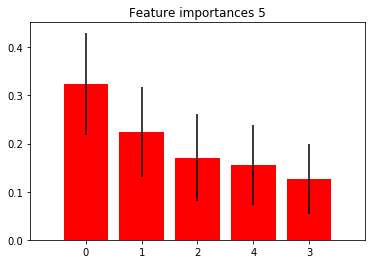

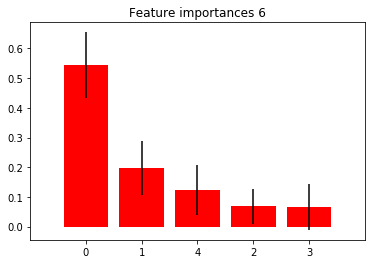

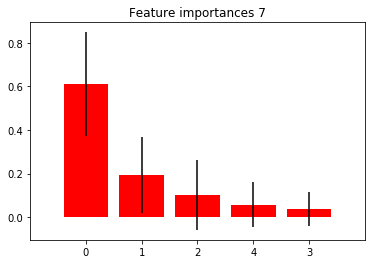

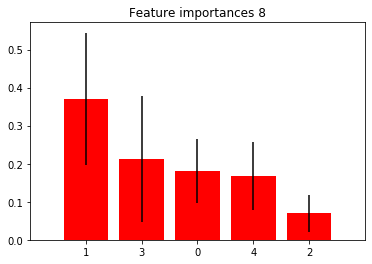

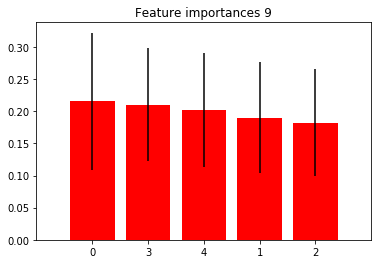

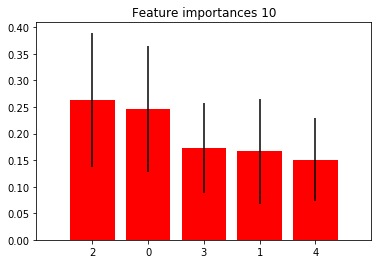

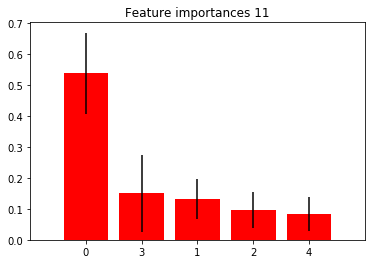

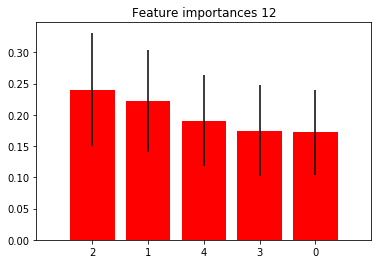

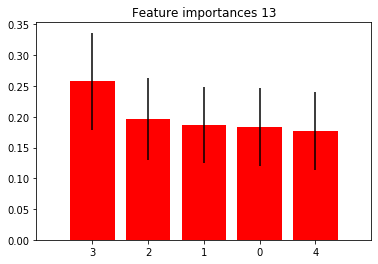

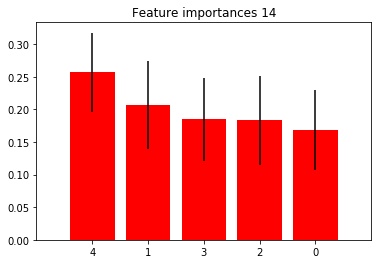

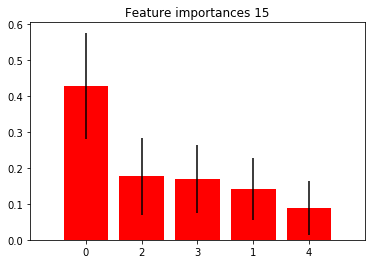

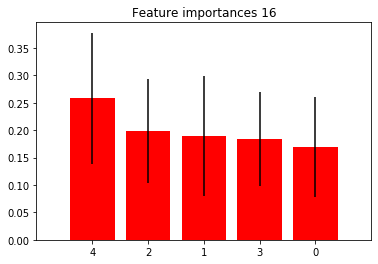

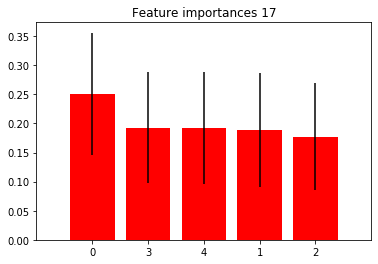

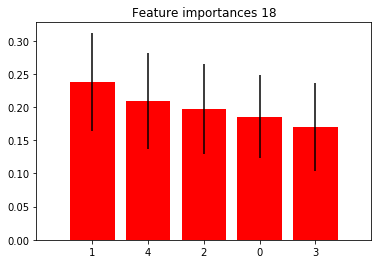

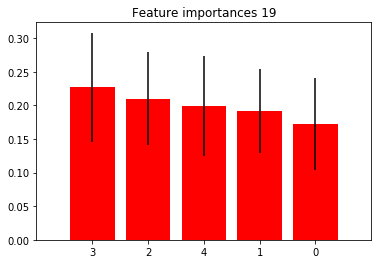

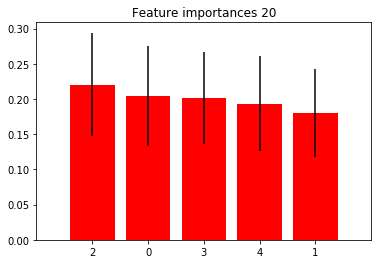

In [12]:
forest = RandomForestRegressor(500)

simulations = [
    linear,
    exponential,
    cubic,
    joint_normal,
    step,
    quadratic,
    w_shaped,
    spiral,
    uncorrelated_bernoulli,
    logarithmic,
    fourth_root,
    sin_four_pi,
    sin_sixteen_pi,
    square,
    two_parabolas,
    circle,
    ellipse,
    diamond,
    multiplicative_noise,
    multimodal_independence
]


dim = 5
i = 0
for sim in simulations:
    x, y = sim(100, dim)
    if y.shape[1] == 1:
        y = y.ravel()
    forest.fit(x, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure()
    plt.title("Feature importances {}".format(i + 1))
    plt.bar(range(x.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(x.shape[1]), indices)
    plt.xlim([-1, x.shape[1]])
    plt.show()
    i += 1